## 5.1.2, 5.3.1, 5.7.1, 5.9.1

# 5.1.2

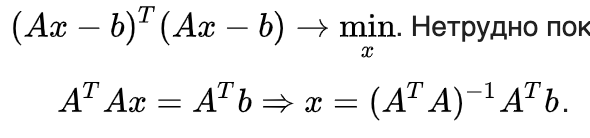

In [1]:
from IPython.display import Image
Image("/Users/alinacodzy/Screenshots/Screenshot2019-06-09at23.56.34.png")

In [2]:
import numpy as np

X = np.array([0, 0.375, 0.563, 0.75,
              1.125, 1.313, 1.5, 1.690,
              1.875, 2.063, 2.25, 2.438,
              2.625, 2.813, 3])
Y = np.array([4.568, 3.365, 2.810,
              2.624, 0.674, 0.557,
              0.384, -0.566, -1.44,
              -1.696, -1.91, -2.819,
              -3.625, -3.941, -4.367])


def MNK(X, Y, m):
    A = np.array([[x**j for j in range(m + 1)] for x in X])
    return np.linalg.solve(A.T@A, A.T@Y)


def polynom(X, koefs):
    return np.sum(koefs*(X**np.arange(koefs.shape[0])))


In [3]:
sigmas = []
for m in range(10):
    koefs = MNK(X, Y, m)
    Y_pred = np.array([polynom(x, koefs) for x in X])
    sigma = np.sqrt(np.sum((Y_pred - Y)**2)/(Y.shape[0] - m))
    sigmas.append(sigma)
    
print(sigmas)

[2.7149005187422, 0.2365242281887295, 0.24464557985460963, 0.2543915059776197, 0.26556325200149095, 0.2739538245181688, 0.2826772563201388, 0.29895037813901154, 0.3110718755243903, 0.3087089667383798]


In [4]:
import matplotlib.pyplot as plt

plt.bar(np.arange(10), sigmas)
plt.xlabel('m')
plt.ylabel('sigma')

Text(0, 0.5, 'sigma')

Сигма стабилизируется со степени 1 и возрастает до степени 8
Оптимальная степень  1

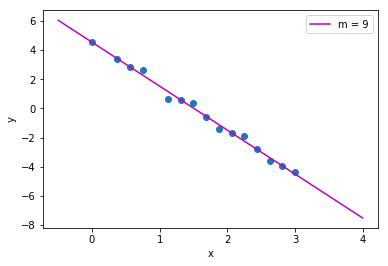

In [5]:
# %matplotlib notebook

m_optimal = 1
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
X_test = np.linspace(-0.5, 4, 40)


koefs = MNK(X, Y, m_optimal)
Y_pred = np.array([polynom(x, koefs) for x in X_test])
plt.plot(X_test, Y_pred, label='m = ' + str(m), color='m')
plt.legend()

# 5.3.1

In [6]:
X = np.array([-2.5, -2, -1.5, -1, -0.5, 0, 0.5, 1, 1.5, 2, 2.5])
Y = np.array([0.876, 0.29523, 0.75958,
               1.49184, 2.23671, 2.56000,
               2.23671, 1.49184, 0.75958,
               0.29523, 0.0876], dtype=float)

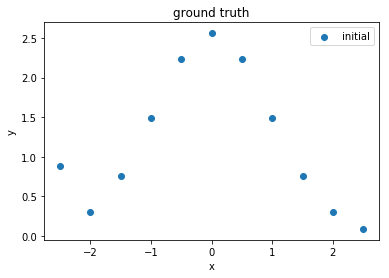

In [7]:
# %matplotlib notebook

plt.scatter(X, Y, label='initial')
plt.title('ground truth')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()


2.299335998706104 -0.2093259175449133


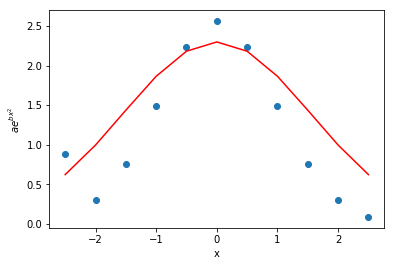

In [8]:
#Замена

t = np.array([x*x for x in X])
s = np.array([np.log(i) for i in Y]) + t

A = np.hstack([np.ones(len(X)).reshape(-1, 1), X.reshape(-1,1)])
a, b = np.linalg.lstsq(A, s, rcond=None)[0]

print(a, b)

# %matplotlib notebook
plt.scatter(X, Y)
plt.plot(X, a*np.exp(b*X*X), c = 'r')
plt.xlabel('x')
plt.ylabel('$ae^{bx^{2}}$');

# 5.7.1

# 5.9.1

In [35]:
def f(x):
    return abs(np.sin(x))

def df(x):
    return -np.cos(x)

a, b = -np.pi, np.pi 
n = 10

x = np.linspace(a, b, n+1)

In [40]:
def tmp(n, graph=False):
    node = np.linspace(a, b, n)
    f_node = f(node)
    
    if graph:
        plt.figure()
        plt.scatter(node, f_node)
        plt.title('Узлы')
    
    v = np.ones(len(node))
    for i in range(1, len(node)):
        v = np.vstack((v,node**i))
    V = v.T
    
    c = np.linalg.solve(V, f_node)
    
    # построим график многочлена метода глобальной интерполяции и исходные узлы
    if graph:
        plt.figure()
        plt.plot(node, [poly(c,j) for j in node], c='red')
        plt.scatter(node, f_node, c='blue')
        plt.title('Интерполяционный многочлен и исходные узлы')
    
    return np.array([poly(c,j) for j in node]), f_node
    
def poly(c, x):
    return np.sum([c[i]*x**i for i in range(len(c))])


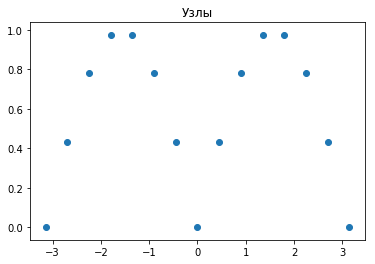

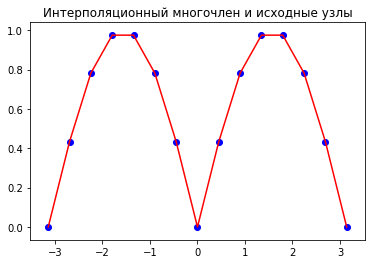

In [38]:
tmp(15, graph=True)

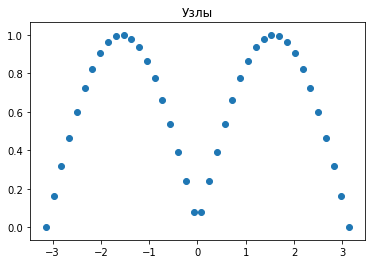

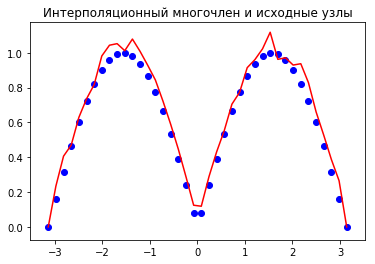

In [39]:
tmp(40, graph=True)

In [41]:
err = []
for i in range(5, 100):
    err.append(max((tmp(i)[0] - tmp(i)[1])))
err = np.array(err)

Text(0.5, 1.0, 'Зависимость максимального отклонения интерполяционного многочлена от исходной функции')

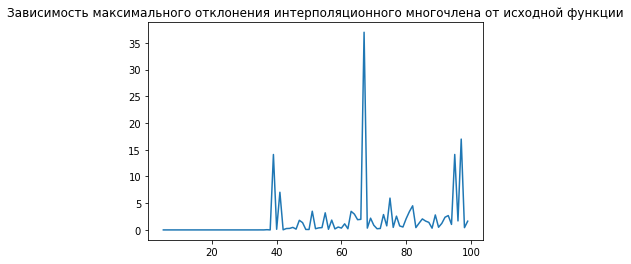

In [42]:
plt.plot(np.arange(5, 100), err)
plt.title('Зависимость максимального отклонения интерполяционного многочлена от исходной функции')